# **Классификация победителя раунда в матче CS:GO**
## Предсказание команды-победителя (CT или T)

## 1. Описание

### 1.1 Описание набора данных
> Имеется 82 014 наборов данных, каждый из которых указывает на определённое состояние раунда в матче по игре Counter-Strike: Global Offensive. Наборы данных состоят из ряда известных признаков, в том числе количество живых игроков обеих команд, общее количество их очков здоровья, наличие у них тех или иных вооружений. Также известен target, команда-победитель в раунде, со значением CT, если победила команда контр-террористов, и T если победила команда террористов.
Требуется построить модель, предсказывающую значение признака target для 40 396 состояний раундов из тестового набора данных.
Мерой точности является доля правильных ответов (Accuracy).

> Датасет можно найти на Kaggle: https://www.kaggle.com/competitions/csgo-classification-ru/overview

### 1.2 Оценка


> Мерой точности является доля правильных ответов:

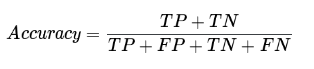



### 1.3 Описание признаков

<table>
  <tr>
    <th>Название признака</th>
    <th>Описание</th>
  </tr>
  <tr>
    <td>id</th>
    <td>Идентификатор</th>
  </tr>
  <tr>
    <td>time_left</td>
    <td>Оставшееся время до конца текущего раунда.</td>
  </tr>
  <tr>
    <td>ct_score</td>
    <td>Текущий счёт команды CT.</td>
  </tr>
  <tr>
    <td>t_score</td>
    <td>Текущий счёт команды T.</td>
  </tr>
  <tr>
    <td>map</td>
    <td>Карта матча.</td>
  </tr>
  <tr>
    <td>bomb_planted</td>
    <td>Наличие заложенной бомбы.</td>
  </tr>
  <tr>
    <td>ct_health</td>
    <td>Общее количество очков здоровья команды CT.</td>
  </tr>
  <tr>
    <td>t_health</td>
    <td>Общее количество очков здоровья команды T.</td>
  </tr>
  <tr>
    <td>ct_armor</td>
    <td>Общее количество очков брони команды CT.</td>
  </tr>
  <tr>
    <td>t_armor</td>
    <td>Общее количество очков брони команды T.</td>
  </tr>
  <tr>
    <td>ct_money</td>
    <td>Общее количество денег команды CT.</td>
  </tr>
  <tr>
    <td>t_money</td>
    <td>Общее количество денег команды T.</td>
  </tr>
  <tr>
    <td>ct_helmets</td>
    <td>Общее число шлемов в команде CT.</td>
  </tr>
  <tr>
    <td>t_helmets</td>
    <td>Общее число шлемов в команде T.</td>
  </tr>
  <tr>
    <td>ct_defuse_kits</td>
    <td>Общее число наборов сапёра в команде CT.</td>
  </tr>
  <tr>
    <td>ct_players_alive</td>
    <td>Количество живых игроков в команде CT.</td>
  </tr>
  <tr>
    <td>t_players_alive</td>
    <td>Количество живых игроков в команде T.</td>
  </tr>
  <tr>
    <td>ct_weapon_X</td>
    <td>Общее число оружия X в команде CT.</td>
  </tr>
  <tr>
    <td>t_weapon_X</td>
    <td>Общее число оружия X в команде T.</td>
  </tr>
  <tr>
    <td>ct_grenade_X</td>
    <td>Общее число гранат X в команде CT.</td>
  </tr>
  <tr>
    <td>t_grenade_X</td>
    <td>Общее число гранат X в команде T.</td>
  </tr>
  <tr>
    <td>target</td>
    <td>Победитель раунда.</td>
  </tr>
</table>


## 2. Первичный анализ данных

### 2.1 Подключение модулей

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

In [2]:
#увеличение количества отображаемых признаков до 100
pd.options.display.max_columns = 100

### 2.2 Загрузка данных

In [3]:
#ссылки на датасеты
url_sample_submission = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/sample_submission.csv"
url_test = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/test.csv"
url_train = "https://raw.githubusercontent.com/VsD-0/CS-GO-Machine_Learning/master/train.csv"

In [59]:
#считывание датасетов
data = pd.read_csv(url_sample_submission)
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

### 2.3 Информация о данных

In [5]:
data.head(10)

,id,target
0,1,CT
1,2,T
2,3,CT
3,4,T
4,5,CT
5,6,T
6,7,CT
7,8,T
8,9,CT
9,10,T


In [6]:
train.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,10200.0,4.0,2.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,13950.0,0.0,5.0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,7200.0,1.0,2.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,1750.0,1.0,4.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,650.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,de_mirage,False,291.0,233.0,277.0,95.0,9700.0,6400.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2

In [7]:
test.head(10)

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,150.0,10400.0,2.0,5.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,10200.0,27050.0,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0
2,3,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,600.0,500.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,3300.0,18850.0,2.0,4.0,2.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,5,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,1900.0,23100.0,2.0,5.0,1.0,3.0,5.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,54.96,5.0,4.0,de_dust2,False,203.0,478.0,267.0,477.0,750.0,17100.0,1.0,5.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
6,7,94.94,4.0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40396 non-null  int64 
 1   target  40396 non-null  object
dtypes: int64(1), object(1)
memory usage: 631.3+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            40396 non-null  int64  
 1   time_left                     40396 non-null  float64
 2   ct_score                      40396 non-null  float64
 3   t_score                       40396 non-null  float64
 4   map                           40396 non-null  object 
 5   bomb_planted                  40396 non-null  bool   
 6   ct_health                     40396 non-null  float64
 7   t_health                      40396 non-null  float64
 8   ct_armor                      40396 non-null  float64
 9   t_armor                       40396 non-null  float64
 10  ct_money                      40396 non-null  float64
 11  t_money                       40396 non-null  float64
 12  ct_helmets                    40396 non-null  float64
 13  t

In [11]:
#describe
#main features
#why test dataset is so shit?

In [52]:
train.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
count,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.0,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.0,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.0,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.0,82014.0,82014.000000,82014.000000,82014.000000,82014.000000,82014.0,82014.000000,82014.0,82014.000000,82014.000000,82014.0,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000
mean,98.015517,6.701112,6.773319,3.517729,0.111115,412.824591,402.988051,314.445729,298.464433,9770.425781,11209.450216,2.053601,2.772441,1.614139,4.279989,4.268503,0.275685,1.243032,0.133721,0.007730,0.574024,0.320250,0.0,0.000098,0.151547,0.106275,0.003963,0.001792,0.110103,0.004755,0.0,0.000780,0.010974,0.111676,0.006913,3.313190,0.000012,0.0,0.063916,0.002731,1.076402,0.053186,0.007499,0.107969,0.004438,0.000049,0.001463,0.002658,0.001878,0.002036,0.147597,0.005938,0.0,0.0,0.000939,0.000073,0.000159,0.000183,0.0,0.000061,0.0,0.000146,0.000719,0.0,0.238557,0.822372,0.059368,0.020216,0.047150,0.036104,0.007572,0.000293,0.441729,0.379935,0.062087,0.009608,3.186249,0.121638,0.235387,0.291633,0.174226,0.004828,0.008328,0.028727,0.899517,0.440852,1.853293,1.858829,1.539627,1.625223,1.000927,0.019899,0.047724,1.352501,0.027690,0.026044,0.509535
std,54.418579,4.762211,4.806576,1.928140,0.314277,131.745622,139.830286,171.023084,174.583765,11181.916111,12145.102354,1.842050,2.011496,1.603782,1.200431,1.227950,0.587017,1.363701,0.460166,0.092062,0.673363,0.476377,0.0,0.009876,0.446078,0.382001,0.062826,0.042299,0.386602,0.070718,0.0,0.035258,0.111856,0.407790,0.087442,1.626987,0.003492,0.0,0.263097,0.052886,1.219156,0.247505,0.092938,0.411463,0

In [53]:
test.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
count,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.0,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.0,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.0,40396.0,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.0,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.0,40396.000000,40396.0,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.00000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000,40396.000000
mean,97.625842,6.725740,6.794881,3.525126,0.113155,410.648802,402.159125,313.525720,298.404545,9826.782355,11305.165115,2.054510,2.776067,1.612882,4.261090,4.261486,0.272403,1.245742,0.136424,0.007451,0.573027,0.323101,0.0,0.000050,0.152886,0.105605,0.004109,0.001733,0.110209,0.004703,0.0,0.000817,0.011189,0.107511,0.006931,3.304114,0.0,0.0,0.063620,0.002723,1.075899,0.051812,0.007674,0.105976,0.004332,0.000050,0.001461,0.002946,0.002352,0.001782,0.145782,0.005050,0.0,0.000025,0.001064,0.000173,0.000173,0.000099,0.0,0.000050,0.0,0.000124,0.000718,0.000025,0.240346,0.830156,0.059783,0.020893,0.044955,0.037207,0.007525,0.000198,0.438534,0.382761,0.06107,0.008937,3.166675,0.123948,0.240197,0.291588,0.173681,0.005149,0.007699,0.027503,0.898257,0.432988,1.852881,1.856619,1.543222,1.631053,1.004085,0.019655,0.048594,1.351272,0.027701,0.025151,0.499802
std,54.559586,4.847031,4.857836,1.931027,0.316786,133.388027,140.099128,171.043699,174.564041,11282.042050,12198.571060,1.840314,2.009757,1.609849,1.215643,1.229087,0.578110,1.364279,0.460580,0.090214,0.673028,0.477255,0.0,0.007036,0.445571,0.375888,0.063973,0.041592,0.393767,0.070908,0.0,0.040718,0.112686,0.402126,0.085899,1.623346,0.0,0.0,0.262454,0.053518,1.219040,0.246001,0.096686,0.41243

In [ ]:
#score - 32, 33
#t_health - 600
#t_players_alive - 6
#t_weapon_glock - 9
#ct_weapon_bizon - 0
#ct_weapon_g3sg1 - 0
#ct_weapon_m249 - 0.003(ничтожно мало)
#t_weapon_m249 - 0
#ct_weapon_negev - 0
# t_weapon_negev - 0.004(ничтожно мало)
#ct_weapon_r8revolver - 0
#t_weapon_r8revolver - 0.007(ничтожно мало)
#ct_weapon_sawedoff - 0
#t_weapon_scar20 - 0.004(ничтожно мало)
#ct_weapon_usps - 10
#ct_grenade_smokegrenade(test) - 6
#t_grenade_smokegrenade(test) - 9

In [62]:
train[train['ct_score']>16]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
34,46.90,19.0,20.0,de_nuke,False,500.0,500.0,500.0,500.0,22200.0,22750.0,0.0,5.0,3.0,5.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,T
78,157.57,18.0,18.0,de_overpass,False,500.0,500.0,500.0,500.0,48950.0,53700.0,5.0,5.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,T
147,106.05,20.0,19.0,de_vertigo,False,500.0,500.0,500.0,500.0,46550.0,51650.0,4.0,5.0,3.0,5.0,5.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,5.0,4.0,4.0,3.0,0.0,0.0,5.0,0.0,0.0,CT
174,54.90,18.0,19.0,de_overpass,False,334.0,90.0,400.0,183.0,21300.0,18800.0,4.0,2.0,4.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,CT
219,174.93,17.0,15.0,de_inferno,False,500.0,500.0,296.0,0.0,68350.0,48700.0,3.0,0.0,3.0,5.0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [61]:
test[test['ct_score']>16]

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
52,53,54.96,20.0,18.0,de_nuke,False,187.0,400.0,200.0,400.0,14300.0,24200.0,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0
56,57,114.88,21.0,22.0,de_train,False,500.0,500.0,500.0,429.0,2000.0,34300.0,1.0,5.0,3.0,5.0,5.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,5.0,5.0,3.0,1.0,0.0,4.0,1.0,0.0
68,69,174.91,18.0,19.0,de_overpass,False,500.0,500.0,0.0,359.0,58350.0,71750.0,0.0,4.0,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,125,29.91,22.0,21.0,de_nuke,False,139.0,226.0,190.0,285.0,20000.0,24500.0,2.0,3.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,170,175.00,17.0,15.0,de_nuke,False,500.0,500.0,500.0,400.0,20050.0,7050.0,5.0,3.0,5.0,5.0,5.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,2.0,4.0,3.0,4.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40203,40

In [64]:
train[train['t_players_alive']>5]#delete

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
26726,175.0,0.0,0.0,de_vertigo,False,400.0,600.0,0.0,0.0,3200.0,4800.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T


In [67]:
test[test['t_players_alive']>5]#delete

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade


In [65]:
train[train['t_weapon_glock']>5]#delete

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
1299,175.00,15.0,15.0,de_train,False,500.0,500.0,0.0,0.0,80000.0,80000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
13027,175.00,9.0,14.0,de_mirage,False,500.0,500.0,0.0,182.0,21350.0,42900.0,0.0,2.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,T
21547,175.00,2.0,4.0,de_nuke,False,500.0,500.0,99.0,303.0,15100.0,47600.0,0.0,4.0,1.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,T
24905,175.00,1.0,0.0,de_mirage,False,500.0,500.0,284.0,0.0,18400.0,10600.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
26726,175.00,0.0,0.0,de_vertigo,False,400.0,600.0,0.0,0.0,3200.0,4800.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
31036,175.00,7.0,7.0,de_inferno,False,500.0,500.0,498.0,0.0,26900.0,23200.0,5.0,0.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,6.0,2.0,3.0,3.0,1.0,0.0,0.0

In [68]:
test[test['t_weapon_glock']>5]#delete

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
11841,11842,175.0,14.0,13.0,de_dust2,False,500.0,500.0,0.0,407.0,17300.0,47050.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
31451,31452,175.0,6.0,2.0,de_inferno,False,500.0,500.0,196.0,271.0,22750.0,22200.0,2.0,3.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,4.0,6.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0
31761,31762,175.0,7.0,12.0,de_mirage,False,500.0,500.0,0.0,90.0,16000.0,18950.0,0.0,1.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
39441,39442,175.0,1.0,0.0,de_nuke,False,500.0,500.0,255.0,0.0,18150.0,10650.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
train[train['ct_weapon_usps']>5]#delete

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
2619,175.0,4.0,5.0,de_nuke,False,500.0,400.0,0.0,269.0,24650.0,30350.0,0.0,3.0,0.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,T
13027,175.0,9.0,14.0,de_mirage,False,500.0,500.0,0.0,182.0,21350.0,42900.0,0.0,2.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,T
21547,175.0,2.0,4.0,de_nuke,False,500.0,500.0,99.0,303.0,15100.0,47600.0,0.0,4.0,1.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,T
24905,175.0,1.0,0.0,de_mirage,False,500.0,500.0,284.0,0.0,18400.0,10600.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
31036,175.0,7.0,7.0,de_inferno,False,500.0,500.0,498.0,0.0,26900.0,23200.0,5.0,0.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,6.0,2.0,3.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,CT
36494,175.0,10.0,2.0,de_dust2,False,500.0,500.0,0.0,200.0,60000.0,20150.0,0.0,2.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0

In [69]:
test[test['ct_weapon_usps']>5]#delete

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
2344,2345,175.0,0.0,3.0,de_inferno,False,500.0,500.0,0.0,351.0,27300.0,33100.0,0.0,4.0,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,7.0,2.0,9.0,3.0,0.0,0.0,1.0,0.0,0.0
6462,6463,175.0,24.0,24.0,de_dust2,False,500.0,500.0,0.0,0.0,50000.0,50000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31451,31452,175.0,6.0,2.0,de_inferno,False,500.0,500.0,196.0,271.0,22750.0,22200.0,2.0,3.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,4.0,6.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0
32912,32913,175.0,1.0,1.0,de_inferno,False,500.0,500.0,0.0,264.0,9150.0,17450.0,0.0,3.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
38152,38153,175.0,15.0,15.0,de_vertigo,False,500.0,500.0,0.0,0.0,80000.0,80000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38452,38453,175.0,15.0,15.0,de_dust2,False,500.0,500.0,0.0,0.0,80000.0,80000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [13]:
train.shape

(82014, 97)

In [14]:
test.shape

(40396, 97)

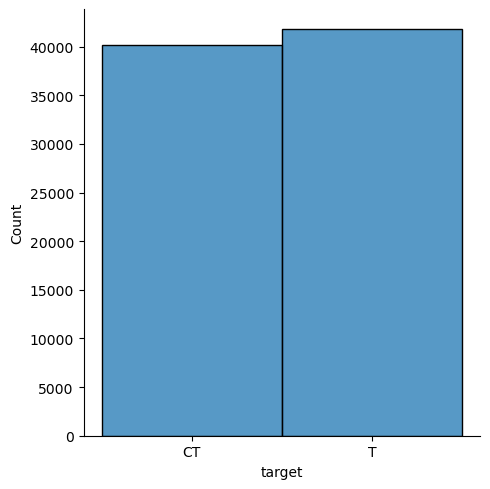

In [15]:
#распределение целевой переменной в тренировочном датасете
sns.displot(train["target"])

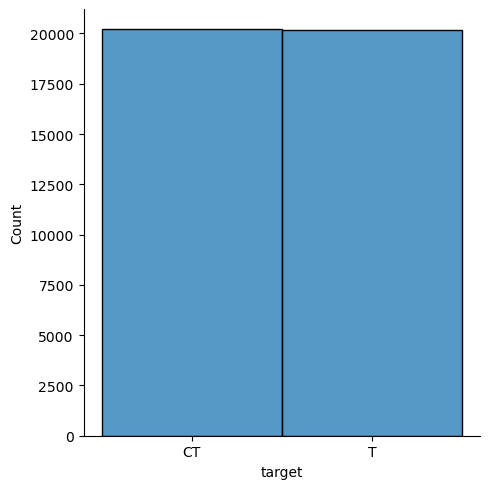

In [16]:
#распределение целевой переменной в тестовом датасете
sns.displot(data["target"])

В датасете присутствуют категориальные признаки, в дальнейшем их нужно закодировать. Также можно закодировать целевую переменную.

В дальнейшем можно будет объединить тестовый датасет с датасетом с целевой переменной.

## 3. Обработка данных

In [17]:
#объединение датасетов и удаление признака "id"
test["target"] = data["target"]
test.drop("id", inplace=True, axis=1)
test.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,150.0,10400.0,2.0,5.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,CT
1,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,10200.0,27050.0,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0,T
2,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,600.0,500.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,CT
3,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,3300.0,18850.0,2.0,4.0,2.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,T
4,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,1900.0,23100.0,2.0,5.0,1.0,3.0,5.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
5,54.96,5.0,4.0,de_dust2,False,203.0,478.0,267.0,477.0,750.0,17100.0,1.0,5.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,T
6,94.9

### 3.1 Кодирование данных

In [18]:
labelencoder = LabelEncoder()

In [19]:
#кодирование признака "map"
map_ = labelencoder.fit_transform(train["map"])
train["map"] = map_
map_test = labelencoder.fit_transform(test["map"])
test["map"] = map_test
#кодирование признака "bomb_planted"
bomb_planted = labelencoder.fit_transform(train["bomb_planted"])
train["bomb_planted"] = bomb_planted
bomb_planted_test = labelencoder.fit_transform(test["bomb_planted"])
test["bomb_planted"] = bomb_planted_test
#кодирование целевой переменной
target = labelencoder.fit_transform(train["target"])
train["target"] = target
target_test = labelencoder.fit_transform(test["target"])
test["target"] = target_test

In [20]:
#проверка на наличие категориальных признаков
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  int32  
 4   bomb_planted                  82014 non-null  int64  
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [21]:
#проверка на наличие категориальных признаков
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     40396 non-null  float64
 1   ct_score                      40396 non-null  float64
 2   t_score                       40396 non-null  float64
 3   map                           40396 non-null  int32  
 4   bomb_planted                  40396 non-null  int64  
 5   ct_health                     40396 non-null  float64
 6   t_health                      40396 non-null  float64
 7   ct_armor                      40396 non-null  float64
 8   t_armor                       40396 non-null  float64
 9   ct_money                      40396 non-null  float64
 10  t_money                       40396 non-null  float64
 11  ct_helmets                    40396 non-null  float64
 12  t_helmets                     40396 non-null  float64
 13  c

Все категориальные признаки были закодированы.

## 4. Подготовка данных к обучению

### 4.1 Корреляционный анализ

<Axes: >

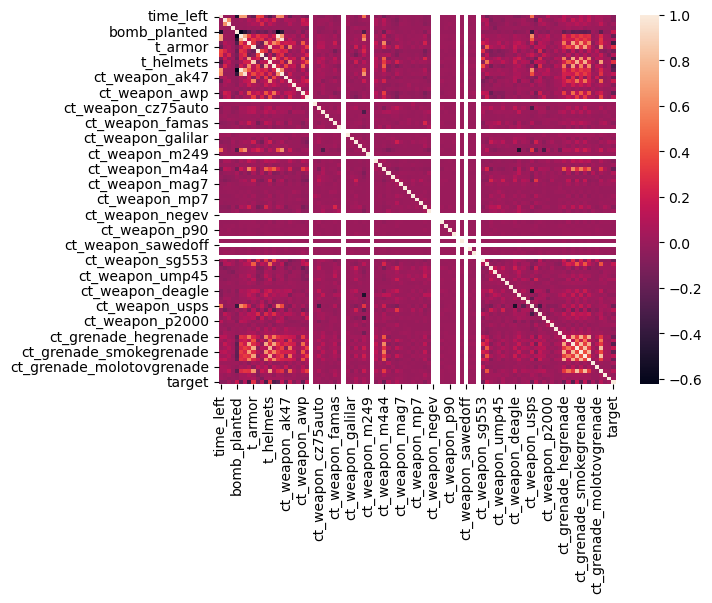

In [22]:
#тепловая карта корреляции тренировочного датасета
sns.heatmap(train.corr())

<Axes: >

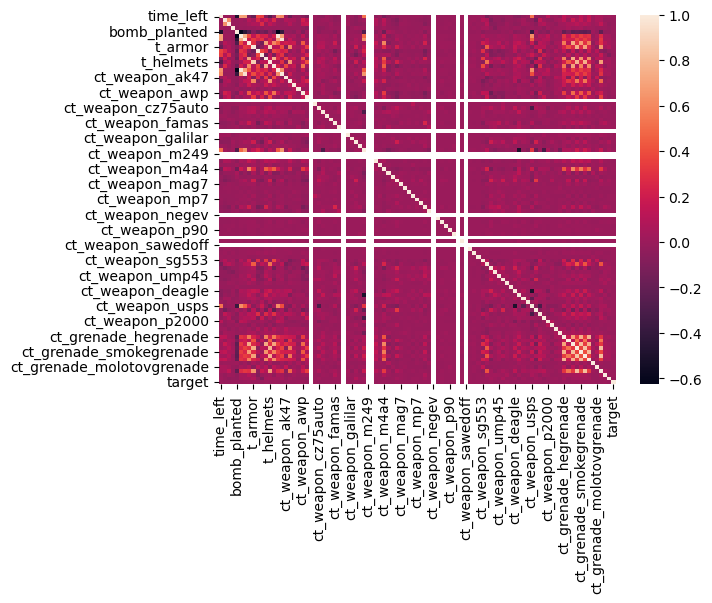

In [23]:
#тепловая карта корреляции тестового датасета
sns.heatmap(test.corr())

Датасеты имеют схожую корреляцию.

Общее количество признаков слишком большое, значит можно только самые важные.

In [24]:
#выявление корреляции между целевой переменной и каждым признаком
for i in train.columns:
    print(i, (train['target'].corr(train[i])))

time_left -0.0667127165051976
ct_score -0.058478507473253526
t_score 0.026279309007501236
map -0.036157845907820965
bomb_planted 0.1811863628679331
ct_health -0.18805352050342075
t_health 0.09455411598042117
ct_armor -0.333613914713521
t_armor 0.29056856024458905
ct_money -0.12932094714507567
t_money 0.09919242156712456
ct_helmets -0.3061317533332897
t_helmets 0.298356718104459
ct_defuse_kits -0.2906633198095444
ct_players_alive -0.21424481675732224
t_players_alive 0.14576455482608786
ct_weapon_ak47 -0.16718072560511554
t_weapon_ak47 0.1918941668676855
ct_weapon_aug -0.08025183801279585
t_weapon_aug 0.035224579044043344
ct_weapon_awp -0.19885570034821948
t_weapon_awp 0.1492010676310432
ct_weapon_bizon nan
t_weapon_bizon 0.0022812962005156123
ct_weapon_cz75auto 0.012903462535856107
t_weapon_cz75auto -0.011563622979785701
ct_weapon_elite -0.016926246184659512
t_weapon_elite 0.011589281740554914
ct_weapon_famas -0.04953185795893046
t_weapon_famas 0.0373464878927853
ct_weapon_g3sg1 nan
t_w

Можно заметить, что некоторые признаки никак не коррелируют с целевой переменной, а значит их можно убрать.

In [25]:
#создание нового датафрейма без некоррелирующий признаков
train_copy = train.copy(deep=True)
train_copy.drop(columns=['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249',
                                'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_r8revolver',
                                't_weapon_scar20', 'ct_weapon_sawedoff'], inplace=True)

In [26]:
#сортировка признаков по корреляции
values_list = []
for i in train_copy.columns:
    values_list.append(train_copy['target'].corr(train_copy[i]))
corr_dict = dict(zip(train_copy.columns, values_list))
sorted_ = sorted(corr_dict.items(), key=lambda item: item[1])
sorted_[::-1]

[('target', 1.0),
 ('t_helmets', 0.298356718104459),
 ('t_armor', 0.29056856024458905),
 ('t_weapon_ak47', 0.1918941668676855),
 ('bomb_planted', 0.1811863628679331),
 ('t_grenade_flashbang', 0.1689217672095437),
 ('t_weapon_sg553', 0.16628527475876825),
 ('t_weapon_awp', 0.1492010676310432),
 ('t_players_alive', 0.14576455482608786),
 ('t_grenade_smokegrenade', 0.14190749140710493),
 ('t_weapon_usps', 0.13619380413204818),
 ('t_grenade_molotovgrenade', 0.11766080076834232),
 ('t_grenade_hegrenade', 0.1158913428850399),
 ('t_money', 0.09919242156712456),
 ('t_health', 0.09455411598042117),
 ('t_weapon_mac10', 0.09028433315784697),
 ('t_weapon_m4a4', 0.08942169730983512),
 ('t_weapon_glock', 0.0727241362343264),
 ('t_weapon_galilar', 0.06676013237993528),
 ('t_weapon_ump45', 0.06583044276528115),
 ('t_grenade_incendiarygrenade', 0.052168119447234575),
 ('t_weapon_p250', 0.04399214054036337),
 ('ct_weapon_ssg08', 0.04097036992902281),
 ('t_weapon_fiveseven', 0.0382774182978462),
 ('t_wea

## Вывод

В данном случае корреляция не позволила выявить наиболее подходящие признаки, т.к. целевая переменная может принимать только 2 значения (T или CT). 

Также большинство признаков имеют относятся к одной стороне, что склоняет корреляцию на соответствующую сторону. Это не позволяет явно определить признаки.

Выбор признаков будет производиться по предметной области.

## 5. Экспериментальный раздел

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [28]:
#функция для обучения моделей и вывод результата
def test_models(X_train, X_test, y_train, y_test):
    models = {"RandomForestClassifier" : RandomForestClassifier(), 
              "LogisticRegression" : LogisticRegression(),
              "GradientBoostingClassifier" : GradientBoostingClassifier()}
    
    for i in models:
        models[i].fit(X_train, y_train) 
        predict = models[i].predict(X_test)
        print(i)
        print(classification_report(predict, y_test))
        print("_"*60)
    
    

### 5.1 Первые 20 признаков по корреляции

In [29]:
#создание датафрейма
new_data = pd.DataFrame()
for i, value in sorted_[len(sorted_)-20:]:
    new_data[i] = train_copy[i]
new_data

,t_weapon_ump45,t_weapon_galilar,t_weapon_glock,t_weapon_m4a4,t_weapon_mac10,t_health,t_money,t_grenade_hegrenade,t_grenade_molotovgrenade,t_weapon_usps,t_grenade_smokegrenade,t_players_alive,t_weapon_awp,t_weapon_sg553,t_grenade_flashbang,bomb_planted,t_weapon_ak47,t_armor,t_helmets,target
0,0.0,0.0,1.0,0.0,0.0,500.0,10200.0,0.0,2.0,0.0,1.0,5.0,0.0,0.0,2.0,0,0.0,400.0,2.0,0
1,0.0,0.0,5.0,0.0,0.0,500.0,13950.0,1.0,5.0,0.0,5.0,5.0,1.0,0.0,5.0,0,4.0,500.0,5.0,1
2,0.0,0.0,0.0,0.0,0.0,200.0,7200.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,0,0.0,200.0,2.0,0
3,0.0,1.0,3.0,0.0,0.0,268.0,1750.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,1,3.0,385.0,4.0,1
4,0.0,0.0,4.0,0.0,0.0,500.0,650.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0,0.0,300.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82009,0.0,0.0,4.0,0.0,0.0,400.0,11350.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,3.0,0,3.0,345.0,4.0,0
82010,0.0,0.0,4.0,0.0,1.0,379.0,10750.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,3.0,0,2.0,357.0,4.0,1
82011,0.0,0.0,3.0,0.0,0.0,500.0,1350.0,1.0,1.0,0.0,2.0,5.0,0.0,3.0,2.0,0,0.0,300.0,2.0,0
82012,0.0,1.0,2.0,0.0,0.0,500.0,9400.0,0.0,1.0,0.0,2.0,5.0,0.0,0.0,2.0,0,0.0,200.0,1.0,0


In [30]:
#обучение моделей
test_models(new_data.drop("target", axis=1),
            test[new_data.columns].drop("target", axis=1), 
            new_data["target"], 
            test["target"])

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.46      0.50      0.48     18645
           1       0.54      0.50      0.52     21751

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396

____________________________________________________________
LogisticRegression
              precision    recall  f1-score   support

           0       0.30      0.50      0.38     12112
           1       0.70      0.50      0.58     28284

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.48     40396
weighted avg       0.58      0.50      0.52     40396

____________________________________________________________
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.46      0.50      0.48     18769
           1       0.53      0.50      0.52   

Модели не могут как-то обоснованно предположить значение целевой переменной, из-за чего просто угадывают его. За счет бинарной классификации угадывают они с вероятностью 0.5.

### 5.2 Логически отобранные признаки

In [31]:
#создание списка признаков
take_list = ['time_left', 'ct_score', 't_score', 'map', 'bomb_planted',
       'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money',
       'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive',
       't_players_alive', 'target']

In [32]:
#обучение моделей
test_models(train[take_list].drop("target", axis=1),
            test[take_list].drop("target", axis=1), 
            train["target"], 
            test["target"])

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     20092
           1       0.50      0.50      0.50     20304

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396

____________________________________________________________


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
              precision    recall  f1-score   support

           0       0.46      0.50      0.48     18579
           1       0.54      0.50      0.52     21817

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396

____________________________________________________________
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.52      0.50      0.51     21052
           1       0.47      0.50      0.48     19344

    accuracy                           0.50     40396
   macro avg       0.50      0.50      0.50     40396
weighted avg       0.50      0.50      0.50     40396

____________________________________________________________


Модели не могут как-то обоснованно предположить значение целевой переменной, из-за чего просто угадывают его. За счет бинарной классификации угадывают они с вероятностью 0.5.

### 5.3 Проверка на тренировочном датасете

In [33]:
#разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(train.drop("target", axis=1),
                                                    train["target"], 
                                                    test_size=0.3,
                                                    stratify=train["target"],  
                                                    random_state=42)

#обучение моделей
test_models(X_train, X_test, y_train, y_test)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     12414
           1       0.84      0.86      0.85     12191

    accuracy                           0.85     24605
   macro avg       0.85      0.85      0.85     24605
weighted avg       0.85      0.85      0.85     24605

____________________________________________________________


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
              precision    recall  f1-score   support

           0       0.71      0.74      0.73     11446
           1       0.77      0.73      0.75     13159

    accuracy                           0.74     24605
   macro avg       0.74      0.74      0.74     24605
weighted avg       0.74      0.74      0.74     24605

____________________________________________________________
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     12979
           1       0.73      0.78      0.75     11626

    accuracy                           0.76     24605
   macro avg       0.76      0.76      0.76     24605
weighted avg       0.76      0.76      0.76     24605

____________________________________________________________


Можно заметить, что точность предсказаний значительно выросла, возможно есть проблема в тестовом датасете. 

### 5.4 Проверка на тестовом датасете

In [34]:
#разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(test.drop("target", axis=1),
                                                    test["target"], 
                                                    test_size=0.3,
                                                    stratify=test["target"],  
                                                    random_state=42)
#обучение моделей
test_models(X_train, X_test, y_train, y_test)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      6266
           1       0.48      0.50      0.49      5853

    accuracy                           0.50     12119
   macro avg       0.50      0.50      0.50     12119
weighted avg       0.50      0.50      0.50     12119

____________________________________________________________
LogisticRegression
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      6094
           1       0.50      0.50      0.50      6025

    accuracy                           0.50     12119
   macro avg       0.50      0.50      0.50     12119
weighted avg       0.50      0.50      0.50     12119

____________________________________________________________
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.53      0.50      0.52      6427
           1       0.47      0.50      0.49   

Даже при обучении на данных из тестового датасета, результат тоже 0.5. Модели опять просто гадают.

### 5.5 Объединение датасетов

In [35]:
#создание объединенного датасета
despair = pd.concat([train, test], axis=0)
#разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(despair.drop("target", axis=1),
                                                    despair["target"], 
                                                    test_size=0.3,
                                                    stratify=despair["target"],  
                                                    random_state=42)
#обучение моделей
test_models(X_train, X_test, y_train, y_test)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.72      0.71      0.72     18367
           1       0.72      0.72      0.72     18356

    accuracy                           0.72     36723
   macro avg       0.72      0.72      0.72     36723
weighted avg       0.72      0.72      0.72     36723

____________________________________________________________
LogisticRegression
              precision    recall  f1-score   support

           0       0.62      0.67      0.64     16887
           1       0.70      0.65      0.68     19836

    accuracy                           0.66     36723
   macro avg       0.66      0.66      0.66     36723
weighted avg       0.66      0.66      0.66     36723

____________________________________________________________
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     19373
           1       0.64      0.69      0.67   

 Модели обученные на объединененном датасете дало худший результат по сравнению с моделями обученными на тренировочном датасете, что говорит о том, что, возможно, тестовый датасет составлен некорректно. 

## Вывод

1. Для обучения были взяты 3 модели: RandomForestClassifier, LogisticRegression, GradientBoostingClassifier
2. Было выявлено, что тестовый датасет, возможно, составен некорректно
3. В дальнейшем будет оптимизироваться модель RandomForestClassifier, т.к. показал лучшие результаты по всем метрикам. Будет использоваться вариант обученный на тренирвоочном датасете.

## 6. Оптимизация модели

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("target", axis=1),
                                                    train["target"], 
                                                    test_size=0.3,
                                                    stratify=train["target"],  
                                                    random_state=42)

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 
predict = rfc.predict(X_test)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     12453
           1       0.83      0.86      0.85     12152

    accuracy                           0.85     24605
   macro avg       0.85      0.85      0.85     24605
weighted avg       0.85      0.85      0.85     24605



### 6.1 Понижение размерности

In [38]:
from sklearn.decomposition import PCA

In [39]:
#количество признаков
pca = PCA(n_components=10) 

#разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(train.drop("target", axis=1),
                                                    train["target"], 
                                                    test_size=0.3,
                                                    stratify=train["target"],  
                                                    random_state=42)

RFC = RandomForestClassifier()

#обучение модели
RFC.fit(pca.fit_transform(X_train), y_train) 
predict = RFC.predict(pca.fit_transform(X_test))
print(classification_report(predict, y_test))


              precision    recall  f1-score   support

           0       0.78      0.76      0.77     12396
           1       0.77      0.79      0.78     12209

    accuracy                           0.78     24605
   macro avg       0.78      0.78      0.78     24605
weighted avg       0.78      0.78      0.78     24605



Понижение размерности только ухудшило показатели модели, поэтому в дальнейшем использоваться не будет.

### 6.2 Подбор гиперпараметров

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# %%time
# parameters = {'n_estimators':range(10,26, 5), 
#               'criterion':('gini','entropy','log_loss'), 
#               'max_depth':range(10,21,5), 
#               'bootstrap':(True, False), 
#               'class_weight':('balanced', 'balanced_subsample', None), 
#               'verbose':range(0, 11, 5), 'n_jobs':[6]}

# grid_search = GridSearchCV(RFC, parameters)
# grid_search.fit(X_train,y_train)

In [42]:
# print('Лучшие параметры:', grid_search.best_params_)
# print('Лучшая точность:',grid_search.best_score_)

NameError: name 'grid_search' is not defined

Подбор гиперпараметров не улучшил результатов обучения модели, значит можно оставить значения по умолчанию.

## 7. Визуализация валидации и обучения

In [43]:
#импорт библиотек
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

In [44]:
#создание кривых для тренировочного датасета
train_scores, valid_scores = validation_curve(rfc, 
                                              train.drop("target", axis=1), 
                                              train["target"],
                                              param_name="n_estimators",
                                              param_range=range(1,21,1),
                                              cv=2)
train_scores

array([[0.90148024, 0.89735899],
       [0.90060234, 0.8983832 ],
       [0.95673909, 0.95676348],
       [0.95756822, 0.95703173],
       [0.9770527 , 0.97671129],
       [0.97695515, 0.97554076],
       [0.98480747, 0.98427098],
       [0.984588  , 0.98483186],
       [0.98961153, 0.98924574],
       [0.98944083, 0.98922135],
       [0.9917575 , 0.99207452],
       [0.99256225, 0.992294  ],
       [0.99375716, 0.99402541],
       [0.99387909, 0.99373278],
       [0.99441559, 0.99504963],
       [0.99512278, 0.99551296],
       [0.99561051, 0.99573244],
       [0.99548858, 0.99541542],
       [0.9964884 , 0.99624454],
       [0.996147  , 0.99617139]])

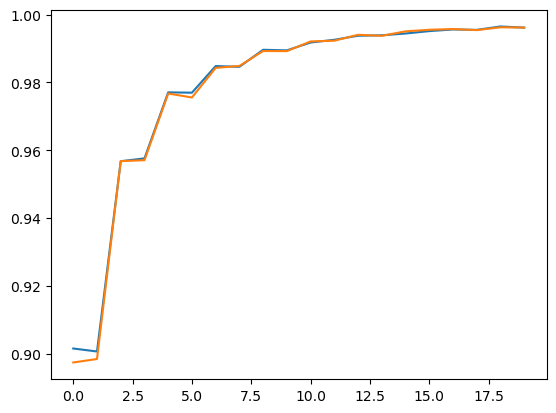

In [45]:
#кривая обучения
plt.plot(train_scores)

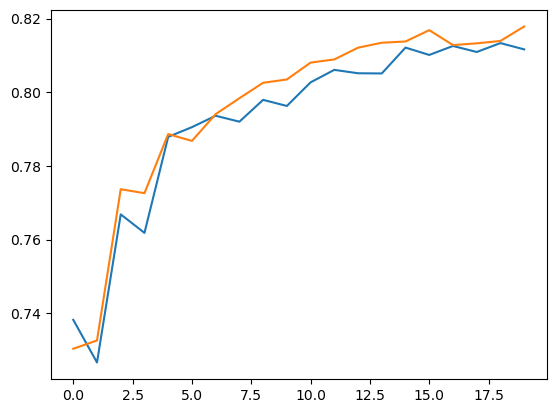

In [46]:
#кривая валидации
plt.plot(valid_scores)

In [48]:
#создание кривых для тестового датасета
train_scores, valid_scores = validation_curve(rfc, 
                                              test.drop("target", axis=1), 
                                              test["target"],
                                              param_name="n_estimators",
                                              param_range=range(1,21,1),
                                              cv=2)
train_scores

array([[0.81339737, 0.81359541],
       [0.81572433, 0.81829884],
       [0.90236657, 0.90687197],
       [0.90672344, 0.90409942],
       [0.94207347, 0.94459848],
       [0.94519259, 0.94578671],
       [0.96643232, 0.96638281],
       [0.96469948, 0.96796713],
       [0.97692841, 0.97707694],
       [0.97747302, 0.97801763],
       [0.98371126, 0.9844044 ],
       [0.98247351, 0.98475097],
       [0.98757303, 0.98796911],
       [0.98737499, 0.98915734],
       [0.9884642 , 0.9899495 ],
       [0.98910783, 0.99074166],
       [0.9909397 , 0.99242499],
       [0.9909397 , 0.99173185],
       [0.99123676, 0.99227646],
       [0.9914348 , 0.99222695]])

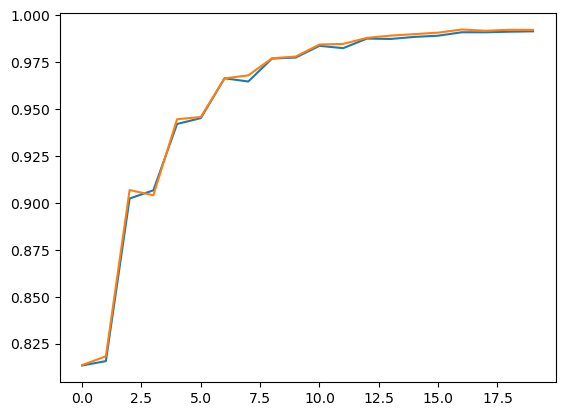

In [49]:
#кривая обучения
plt.plot(train_scores)

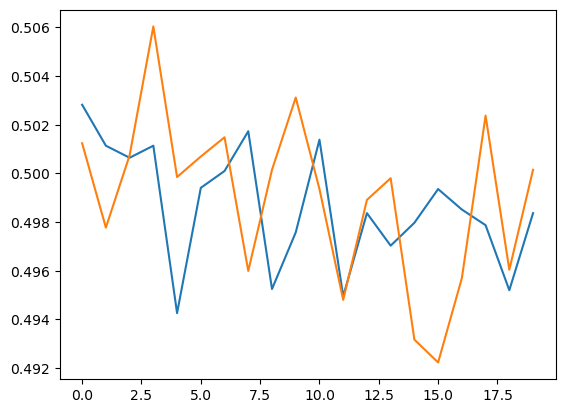

In [50]:
#кривая валидации
plt.plot(valid_scores)

## 8. Сохранение модели

In [ ]:
import pickle

In [ ]:
pkl_filename = "rfc.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(rfc, file)

In [ ]:
with open(pkl_filename, 'rb') as file: 
    pickle_model = pickle.load(file)
pickle_model

## Вывод о проделанной работе

1. Была проведена работа по анализу матчей CS:GO
2. Были закодированы категориальные признаки
3. Проведен корреляционный анализ признаков
4. Проведено несколько экспериментов по обучению моделей на разных наборах данных: 
    * Первые 20 признаков по корреляции
    * Логически отобранные признаки
    * Проверка на тренировочном датасете
    * Проверка на тестовом датасете
    * Объединение датасетов
5. В ходе экспериментов было выявлено, что тестовый набор данных, возможно был сделан некорректно. Для последующей работы был выбран тренировочный датасет
6. Для обучения использовались модели:
    * RandomForestClassifier
    * LogisticRegression
    * GradientBoostingClassifier
7. Из них лучше всего себя показала модель RandomForestClassifier с точностью 0.85
8. Дальнейшая оптимизация состояла из таких этапов, как:
    * Понижение размерности
    * Подбор гиперпараметров с помощью GridSearchCV
9. Оптимизация не оказала положительного влияния на результаты обучения модели
10. Построены кривые валидации и обучения
10. Модель была сохранена в файл